# Tutorial 

In [1]:
import pandas as pd
from autoc import DataExploration, NaImputer, PreProcessor
from autoc.naimputer import missing_map
from autoc.outliersdetection import OutliersDetection
from autoc.utils.getdata import get_dataset
from autoc.utils.helpers import cserie
%matplotlib inline
import matplotlib.pyplot as plt

# Titanic dataset

In [2]:
# Loading Titanic dataset 
titanic = get_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## DataExploration

The DataExploraion class is designed to provide helpers for basic Dataexploration task 

In [4]:
# Instantiate the class this way 
exploration_titanic = DataExploration(titanic)

In [5]:
# The structure function gives a good summary of important characteristics of the dataset like
# missing values, nb_unique values, cst columns, types of the column ...
exploration_titanic.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer,string_length
survived,int64,numeric,0,0.000000,2,False,False,False,integer,NaN
pclass,int64,numeric,0,0.000000,3,False,False,False,integer,NaN
sex,object,factor,0,0.000000,2,False,False,False,string,6
age,float64,numeric,177,0.198653,88,False,False,False,floating,NaN
sibsp,int64,numeric,0,0.000000,7,False,False,False,integer,NaN
parch,int64,numeric,0,0.000000,7,False,False,False,integer,NaN
fare,float64,numeric,0,0.000000,248,False,False,False,floating,NaN
embarked,object,factor,2,0.002245,3,False,False,False,mixed,1
class,object,factor,0,0.000000,3,False,False,False,string,6
who,object,factor,0,0.000000,3,False,False,False,string,5


In [6]:
# If you want more specific primitive :
exploration_titanic.nacolcount()

,Nanumber,Napercentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,0.198653
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.002245
class,0,0.000000
who,0,0.000000


In [7]:
cserie(exploration_titanic.narows_full) # no rows of only missing values

[]

In [8]:
exploration_titanic.count_unique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [9]:
# More complete numeric summary than describe()
exploration_titanic.numeric_summary() # you can access to numeric

,Count,Min,FirstQuartile,Median,Mean,Std,Mad,Skewness,Kurtosis,Thirdquartile,Max
survived,891,0.00,0.0000,0.0000,0.383838,0.486592,0.473013,0.478523,-1.775005,1,1.0000
pclass,891,1.00,2.0000,3.0000,2.308642,0.836071,0.761968,-0.630548,-1.280015,3,3.0000
age,714,0.42,20.1250,28.0000,29.699118,14.526497,11.322944,0.389108,0.178274,38,80.0000
sibsp,891,0.00,0.0000,0.0000,0.523008,1.102743,0.713780,3.695352,17.880420,1,8.0000
parch,891,0.00,0.0000,0.0000,0.381594,0.806057,0.580742,2.749117,9.778125,0,6.0000
fare,891,0.00,7.9104,14.4542,32.204208,49.693429,28.163692,4.787317,33.398141,31,512.3292


In [10]:
# Look at quantiles 

In [11]:
exploration_titanic.dfquantiles(nb_quantiles=10)

,survived,pclass,age,sibsp,parch,fare
0.0,0,1,0.42,0,0,0.0000
0.1,0,1,14.00,0,0,7.5500
0.2,0,1,19.00,0,0,7.8542
0.3,0,2,22.00,0,0,8.0500
0.4,0,2,25.00,0,0,10.5000
0.5,0,3,28.00,0,0,14.4542
0.6,0,3,31.80,0,0,21.6792
0.7,1,3,36.00,1,0,27.0000
0.8,1,3,41.00,1,1,39.6875
0.9,1,3,50.00,1,2,77.9583


### Primitive list :



### Print Warning 

In [12]:
# print Consistency infos 
# This function helps you to trakc potential consistency errors in the dataset
# like duplicates columns, constant columns, full missing rows, full missing columns. 
exploration_titanic.print_infos('consistency', print_empty=False)


{'duplicated_rows': {'action': 'delete',
                     'comment': 'You should delete this rows with df.drop_duplicates()',
                     'level': 'ERROR',
                     'value': Int64Index([ 47,  76,  77,  87,  95, 101, 121, 133, 173, 196,
            ...
            838, 844, 846, 859, 863, 870, 877, 878, 884, 886],
           dtype='int64', length=107)}}


### Fancier Functions

In [13]:
# Nearzerovariance function inspired from caret 
exploration_titanic.nearzerovar()

             freq_ratio    nzv  percent_unique zero_var
survived       1.605263  False        0.224467    False
pclass         2.273148  False        0.336700    False
sex            1.837580  False        0.224467    False
age            1.111111  False        9.876543    False
sibsp          2.909091  False        0.785634    False
parch          5.745763  False        0.785634    False
fare           1.023810  False       27.833895    False
embarked       3.833333  False        0.336700    False
class          2.273148  False        0.336700    False
who            1.981550  False        0.336700    False
adult_male     1.516949  False        0.224467    False
deck           1.255319  False        0.785634    False
embark_town    3.833333  False        0.336700    False
alive          1.605263  False        0.224467    False
alone          1.516949  False        0.224467    False


Index([], dtype='object')

In [14]:
# Find highly correlated columns 
exploration_titanic.findcorr() # no highly numerical correlated columns 

[]

In [15]:
exploration_titanic.findupcol()
# no duplicated cols 

[]

In [16]:
# Recheck duplicated row
titanic.duplicated().sum()

107

## Outliers Detection

 This class is a simple class to detect one dimension outliers.

In [17]:
outlier_detection = OutliersDetection(titanic)

In [18]:
outlier_detection.basic_cutoff

{'cutoff_iqr': 2, 'cutoff_mad': 2, 'cutoff_z': 3}

In [19]:
outlier_detection.strong_cutoff

{'cutoff_iqr': 6, 'cutoff_mad': 6, 'cutoff_z': 6}

In [20]:
soft_outliers_fare = outlier_detection.outlier_detection_serie_1d('fare',cutoff_params=outlier_detection.basic_cutoff)
strong_outliers_fare = outlier_detection.outlier_detection_serie_1d('fare',cutoff_params=outlier_detection.strong_cutoff)

In [21]:
# finding index of your Dataframe
index_strong_outliers = (strong_outliers_fare.is_outlier == 1)

In [22]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [23]:
# a lot of outliers because distribution is lognormal
titanic.loc[index_strong_outliers, :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
61,1,1,female,38,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True


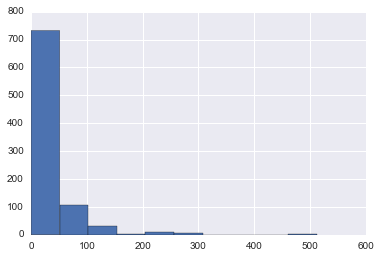

In [24]:
titanic.fare.hist()

In [25]:
outlier_detection.outlier_detection_1d(cutoff_params=outlier_detection.basic_cutoff).head(20)

,fare_iqr_score,fare_mad_score,fare_z_score,fare_is_outlier
0,-0.312011,-0.703808,-0.502445,0
1,2.461242,5.551871,0.786845,1
2,-0.282777,-0.637865,-0.488854,0
3,1.673732,3.775469,0.420730,1
4,-0.277363,-0.625653,-0.486337,0
5,-0.259680,-0.585764,-0.478116,0
6,1.620136,3.654572,0.395814,1
7,0.286744,0.646813,-0.224083,0
8,-0.143827,-0.324433,-0.424256,0
9,0.676348,1.525651,-0.042956,0


## Prerocessor

In [26]:
# initialize preprocessing 
preprocessor = PreProcessor(titanic, copy=True)
print("We made a copy so id titanic :  {} different from id preprocessor.data {}".format(
        id(titanic),id(preprocessor.data)))

We made a copy so id titanic :  4407004560 different from id preprocessor.data 4747383056


In [27]:
# using infos consistency from DataExploration 
preprocessor.print_infos('consistency')

{'duplicated_rows': {'action': 'delete',
                     'comment': 'You should delete this rows with df.drop_duplicates()',
                     'level': 'ERROR',
                     'value': Int64Index([ 47,  76,  77,  87,  95, 101, 121, 133, 173, 196,
            ...
            838, 844, 846, 859, 863, 870, 877, 878, 884, 886],
           dtype='int64', length=107)}}


In [28]:
# basic cleaning delete constant columns 
titanic_clean = preprocessor.basic_cleaning()

We are removing the folowing columns : []
We are removing the folowing rows : [521, 522, 526, 531, 870, 47, 560, 563, 564, 568, 573, 588, 589, 598, 87, 601, 95, 612, 101, 614, 121, 635, 636, 640, 641, 644, 133, 646, 650, 656, 666, 674, 173, 692, 696, 196, 709, 198, 201, 213, 732, 733, 734, 223, 738, 739, 241, 757, 758, 760, 260, 773, 274, 790, 792, 800, 295, 808, 300, 304, 313, 320, 324, 837, 838, 844, 846, 335, 343, 859, 863, 354, 355, 358, 359, 364, 877, 878, 368, 884, 886, 384, 832, 409, 410, 413, 418, 420, 425, 428, 431, 454, 76, 459, 77, 464, 466, 470, 476, 481, 485, 488, 490, 494, 613, 500, 511]


In [32]:
titanic_clean.shape # We removed the dupliated columns 

(784, 15)

In [33]:
titanic.shape

(891, 15)

In [29]:
preprocessor.infer_subtypes() # this function tries to indentify different subtypes of data

{'adult_male': {'dtype': dtype('bool'), 'subtype': 'binary'},
 'age': {'dtype': dtype('float64'), 'subtype': None},
 'alive': {'dtype': dtype('O'), 'subtype': 'binary'},
 'alone': {'dtype': dtype('bool'), 'subtype': 'binary'},
 'class': {'dtype': dtype('O'), 'subtype': 'text_categorical'},
 'deck': {'dtype': dtype('O'), 'subtype': 'text_categorical'},
 'embark_town': {'dtype': dtype('O'), 'subtype': 'text_categorical'},
 'embarked': {'dtype': dtype('O'), 'subtype': 'text_categorical'},
 'fare': {'dtype': dtype('float64'), 'subtype': None},
 'parch': {'dtype': dtype('int64'), 'subtype': 'ordinal'},
 'pclass': {'dtype': dtype('int64'), 'subtype': 'ordinal'},
 'sex': {'dtype': dtype('O'), 'subtype': 'binary'},
 'sibsp': {'dtype': dtype('int64'), 'subtype': 'ordinal'},
 'survived': {'dtype': dtype('int64'), 'subtype': 'binary'},
 'who': {'dtype': dtype('O'), 'subtype': 'text_categorical'}}

In [30]:
preprocessor.subtypes

['text_raw', 'text_categorical', 'ordinal', 'binary', 'other']

# Airbnb Dataset

This is a dataset from airbnb users found (the dataset used here is train_users_2.csv from the 
[this airbnb kaggle competition](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data?train_users_2.csv.zip)

In [34]:
df_airbnb = get_dataset('airbnb_users')

## DataExploration

In [35]:
exploration_airbnb = DataExploration(df_airbnb)

In [36]:
exploration_airbnb.print_infos('consistency')

{}


In [37]:
exploration_airbnb.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer,string_length
id,object,character,0,0.000000,213451,False,False,True,string,10
date_account_created,object,character,0,0.000000,1634,False,False,False,string,10
timestamp_first_active,int64,numeric,0,0.000000,213451,False,False,True,integer,NaN
date_first_booking,object,character,124543,0.583473,1976,False,False,False,mixed,10
gender,object,factor,0,0.000000,4,False,False,False,string,9
age,float64,numeric,87990,0.412226,127,False,False,False,floating,NaN
signup_method,object,factor,0,0.000000,3,False,False,False,string,8
signup_flow,int64,numeric,0,0.000000,17,False,False,False,integer,NaN
language,object,character,0,0.000000,25,False,False,False,string,2
affiliate_channel,object,factor,0,0.000000,8,False,False,False,string,13


In [38]:
exploration_airbnb.sign_summary() # Get sign summary (look for -1 na encoded value for example)

,NumOfNegative,PctOfNegative,NumOfPositive,PctOfPositive
timestamp_first_active,0,0.000000,213451,1.000000
age,0,0.000000,125461,0.587774
signup_flow,164739,0.771788,213451,1.000000


## Outliers Detection 

In [39]:
airbnb_od = OutliersDetection(df_airbnb)

In [40]:
# OutliersDetection is a subclass of DataExploration
airbnb_od.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer,string_length
id,object,character,0,0.000000,213451,False,False,True,string,10
date_account_created,object,character,0,0.000000,1634,False,False,False,string,10
timestamp_first_active,int64,numeric,0,0.000000,213451,False,False,True,integer,NaN
date_first_booking,object,character,124543,0.583473,1976,False,False,False,mixed,10
gender,object,factor,0,0.000000,4,False,False,False,string,9
age,float64,numeric,87990,0.412226,127,False,False,False,floating,NaN
signup_method,object,factor,0,0.000000,3,False,False,False,string,8
signup_flow,int64,numeric,0,0.000000,17,False,False,False,integer,NaN
language,object,character,0,0.000000,25,False,False,False,string,2
affiliate_channel,object,factor,0,0.000000,8,False,False,False,string,13


In [41]:
airbnb_od.numeric_summary() # you can access to numeric

,Count,Min,FirstQuartile,Median,Mean,Std,Mad,Skewness,Kurtosis,Thirdquartile,Max
timestamp_first_active,213451,2.009032e+13,2.012123e+13,2.013091e+13,2.013085e+13,9.253717e+09,6.898231e+09,-0.860883,-3.142610,2.014031e+13,2.014063e+13
age,125461,1.000000e+00,2.800000e+01,3.400000e+01,4.966834e+01,1.556666e+02,2.838745e+01,12.422586,153.568929,4.300000e+01,2.014000e+03
signup_flow,213451,0.000000e+00,0.000000e+00,0.000000e+00,3.267387e+00,7.637707e+00,5.169522e+00,2.234366,3.324444,0.000000e+00,2.500000e+01


In [42]:
airbnb_od.strong_cutoff

{'cutoff_iqr': 6, 'cutoff_mad': 6, 'cutoff_z': 6}

In [43]:
outliers_age = airbnb_od.outlier_detection_serie_1d('age', cutoff_params=airbnb_od.strong_cutoff)
outliers_age.head(10)

,iqr_score,mad_score,z_score,is_outlier
1,0.266667,0.385429,-0.074958,0
2,1.466667,2.119857,0.040675,0
3,0.533333,0.770857,-0.049261,0
4,0.466667,0.674500,-0.055685,0
6,0.800000,1.156286,-0.023565,0
7,0.866667,1.252643,-0.017141,0
8,1.066667,1.541714,0.002131,0
9,0.800000,1.156286,-0.023565,0
10,0.133333,0.192714,-0.087806,0
11,0.866667,1.252643,-0.017141,0


In [44]:
print("nb strong outliers : {}".format(outliers_age.is_outlier.sum()))

nb strong outliers : 2413


In [45]:
index_outliers_age = cserie(outliers_age.is_outlier==1, index=True)

In [46]:
df_airbnb.loc[index_outliers_age,:]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
398,9ouah6tc30,2010-04-12,20100412231534,2010-04-12,FEMALE,104,facebook,3,en,other,craigslist,linked,Web,iPhone,Mobile Safari,FR
627,dc3udjfdij,2010-05-19,20100519012455,2010-06-16,-unknown-,105,basic,2,en,other,craigslist,omg,Web,Mac Desktop,Safari,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1190,qc9se9qucz,2010-07-27,20100727002029,2010-07-27,-unknown-,105,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1208,cguxptdi6h,2010-07-28,20100728034415,2010-07-28,-unknown-,105,basic,3,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US
1239,6vpmryt377,2010-07-30,20100730055204,2010-07-30,FEMALE,2014,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,CA


## Naimputer

In [47]:

#plt.style.use('ggplot') # ggplot2 style for mathplotlib 

In [48]:
naimp = NaImputer(df_airbnb)

In [49]:
naimp.data_isna.corr()

,is_na_date_first_booking,is_na_age,is_na_first_affiliate_tracked
is_na_date_first_booking,1.000000,0.314193,0.045084
is_na_age,0.314193,1.000000,0.087806
is_na_first_affiliate_tracked,0.045084,0.087806,1.000000


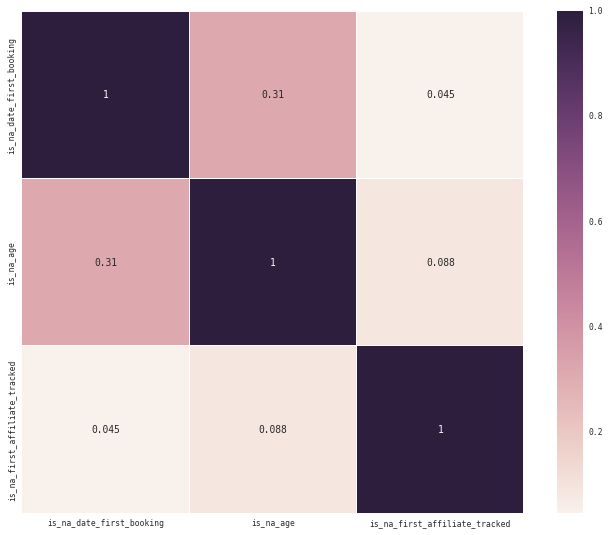

In [50]:
naimp.plot_corrplot_na()

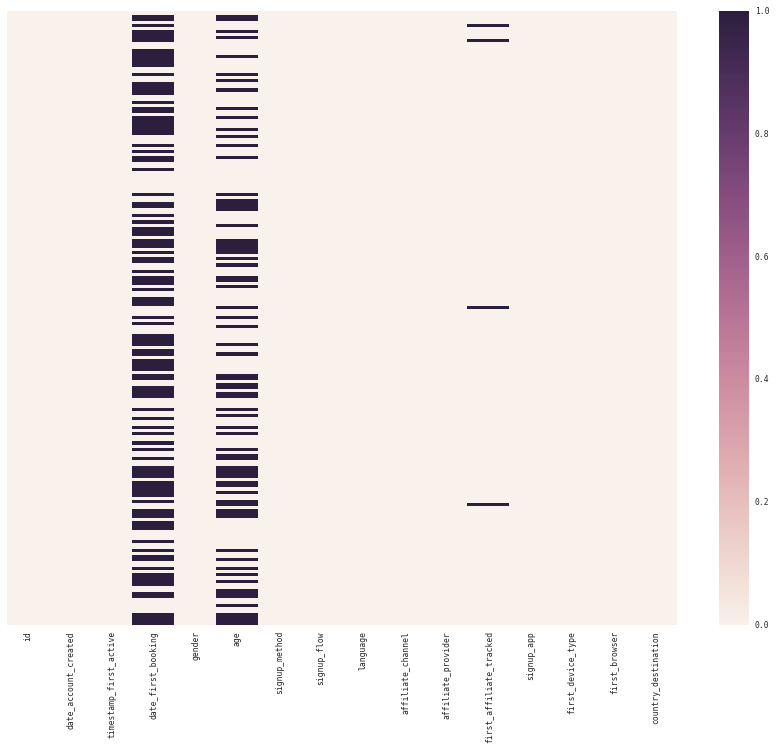

In [51]:
missing_map(df_airbnb, nmax=200)

In [54]:
naimp.get_isna_ttest('age', type_test='ks')

,pvalue,statistic,type_test
timestamp_first_active,0.000000e+00,0.090653,ks
signup_flow,1.989118e-318,0.084137,ks


In [55]:
naimp.get_isna_ttest('age', type_test='ttest')

,pvalue,statistic,type_test
timestamp_first_active,1.804771e-236,32.877547,ttest
signup_flow,0.000000e+00,54.941500,ttest


In [57]:
naimp.get_overlapping_matrix()

,date_first_booking,age,first_affiliate_tracked
date_first_booking,1.000000,0.542897,0.034743
age,0.768428,1.000000,0.045835
first_affiliate_tracked,0.713438,0.664963,1.000000


In [58]:
naimp.nacolcount()

,Nanumber,Napercentage
id,0,0.000000
date_account_created,0,0.000000
timestamp_first_active,0,0.000000
date_first_booking,124543,0.583473
gender,0,0.000000
age,87990,0.412226
signup_method,0,0.000000
signup_flow,0,0.000000
language,0,0.000000
affiliate_channel,0,0.000000
